# Step 1: Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Step 2: Load the dataset

https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning

In [7]:
# prompt: import dataset_phising yang ada pada direktori files

data = pd.read_csv("dataset_phising.csv")
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# Step 3: Dataset analysis

In [11]:
#cek ada fitur apa saja,dan apakah ada data kosong
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [12]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.max(axis=0)

,0
id,10000.0
NumDots,21.0
SubdomainLevel,14.0
PathLevel,18.0
UrlLength,253.0
NumDash,55.0
NumDashInHostname,9.0
AtSymbol,1.0
TildeSymbol,1.0
NumUnderscore,18.0


In [19]:
#hilangkan fitur "id"
data.drop("id", axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [20]:
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


<Axes: >

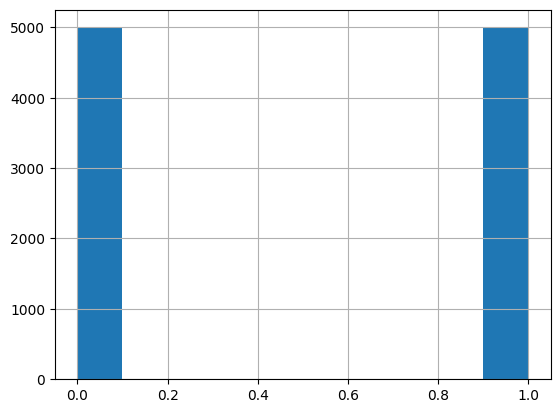

In [18]:
#cek ada ketidakseimbangan data untuk label fitu class label
data['CLASS_LABEL'].hist()

# Step 4: Splitting data

In [21]:
X = data.drop('CLASS_LABEL', axis=1)
y = data['CLASS_LABEL']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
X_test.shape

(2500, 48)

In [27]:
X_train.shape

(7500, 48)

# Step 5: Training Random Forest Algorithm

In [28]:
#mengggunakan sklearn untuk algoritma random forest

from sklearn.ensemble import RandomForestClassifier

In [37]:
#eksekusi algoritma RF
algorithm = RandomForestClassifier()
algorithm.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
#buat prediksi
predict = algorithm.predict(X_test)

In [39]:
#cek hasil perbandingan prediksi dan data sebenarnya
predict == y_test.values

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
#hitung akurasi
sum(predict == y_test.values) / len(predict)

np.float64(0.9844)

# Step 6: Model evaluation metrics

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [43]:
accuracy_score(y_test, predict)

0.9844

In [44]:
precision_score(y_test, predict)

0.9842890809112333

In [45]:
recall_score(y_test, predict)

0.985062893081761

## DETEKSI PHISING MENGGUNAKAN ALGORITMA KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
predict_knn = knn.predict(X_test)

In [56]:
#hitung akurasi
sum(predict_knn == y_test.values) / len(predict_knn)

np.float64(0.8728)

In [57]:
accuracy_score(y_test, predict_knn)

0.8728

In [58]:
precision_score(y_test, predict_knn)

0.8570359281437125

In [59]:
recall_score(y_test, predict_knn)

0.9001572327044025

KESIMPULAN ALGORTIMA RF untuk klasifikasi deteksi phising lebih baik dari pada KNN